In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter
from time import time
from matplotlib.cm import get_cmap

import warnings
warnings.filterwarnings('ignore')

In [2]:
# Załadowanie zbioru danych
train_df = pd.read_csv('final_train.csv', index_col=0)
print('Wiersze i kolumny:\t{}'.format(train_df.shape))
train_df.head()

Wiersze i kolumny:	(11086, 572)


,Activity,"angle(X,gravityMean)","angle(Y,gravityMean)","angle(Z,gravityMean)","angle(tBodyAccJerkMean),gravityMean)","angle(tBodyAccMean,gravity)","angle(tBodyGyroJerkMean,gravityMean)","angle(tBodyGyroMean,gravityMean)",energy-mean(),"fBodyAcc-bandsEnergy()-1,16",...,tGravityAccMag-energy(),tGravityAccMag-entropy(),tGravityAccMag-iqr(),tGravityAccMag-mad(),tGravityAccMag-max(),tGravityAccMag-mean(),tGravityAccMag-min(),tGravityAccMag-sma(),tGravityAccMag-std(),void()
0,STANDING,-1.574191,-0.805700,-2.453831,-1.861714,0.115517,-2.023369,3.125860,-9.474436,3.622600,...,5.049130,3.272281,5.103018,-0.823302,3.063681,-0.928676,-1.007695,3.094236,1.669987,1.0
1,WALKING_UPSTAIRS,-1.568669,-0.612620,-2.488338,-1.751117,0.218134,0.280294,7.953403,-0.679894,2.512880,...,4.565443,4.440779,3.288399,-2.689605,1.705341,-0.822617,-0.572410,-2.187890,-0.544652,2.0
2,LAYING,-1.548333,-0.139628,-2.380889,-1.915239,0.067613,-0.887342,6.007361,-11.906904,3.621984,...,5.059609,2.296603,5.344174,-0.549843,3.272225,-0.940610,-1.031522,-2.071755,2.024442,3.0
3,WALKING,-1.574094,-0.793443,-2.449959,-1.842741,-0.195625,-0.950671,2.104353,-11.906121,3.355701,...,4.860758,4.177535,3.950012,-0.322642,2.366287,-0.866937,-0.696431,1.863375,0.550414,2.0
4,LAYING,-1.548333,-0.139628,-2.380889,NaN,0.067613,-0.887342,6.007361,-11.970485,3.621984,...,5.059609,2.296603,5.344174,-0.549843,3.272225,-0.940610,-1.031522,-2.102513,2.024442,3.0


In [3]:
# splitowanie zmiennych po nazwach
pd.DataFrame.from_dict(Counter([m.split('-')[0].split('(')[0] for m in train_df.columns]),orient='index').rename(columns={0:'count'})

,count
Activity,1
angle,7
energy,1
fBodyAcc,82
fBodyAccJerk,79
fBodyAccMag,13
fBodyBodyAccJerkMag,13
fBodyBodyGyroJerkMag,13
fBodyBodyGyroMag,13
fBodyGyro,79


In [4]:
# utworzenie zmiennych przechowujących nazwy aktywności i ilość ich występowania
aktywnosc_index = train_df['Activity'].groupby(train_df['Activity']).count().index
aktywnosc_values = train_df['Activity'].groupby(train_df['Activity']).count().values

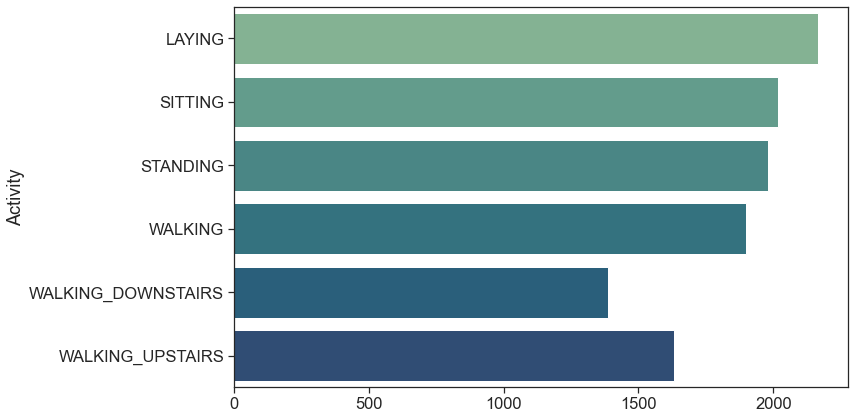

In [5]:
# Wykres typu barplot ukazujący częstość występowania danej aktywności
plt.figure(figsize=(11, 7))
sns.set(font_scale = 1.5,style='ticks')
sns.barplot(y=aktywnosc_index, x=aktywnosc_values, palette="crest",orient = 'h')
plt.savefig("graphics/00_activity_quantity.png", transparent=True, dpi=300, bbox_inches='tight')

In [6]:
# sprawdzenie wartości null-owych i duplikatów w datasecie
is_null = train_df.isna().sum().sum()
is_duplicated = sum(train_df.duplicated())

In [7]:
print('Ilość wartości NULL w zbiorze danych: {}\n'.format(is_null))
#train_df = train_df.dropna(how='any',axis=0) 
#print(train_df.count())

Ilość wartości NULL w zbiorze danych: 32636



In [8]:
print('Ilość danych powtarzających się w zbiorze: {}'.format(is_duplicated))


Ilość danych powtarzających się w zbiorze: 111


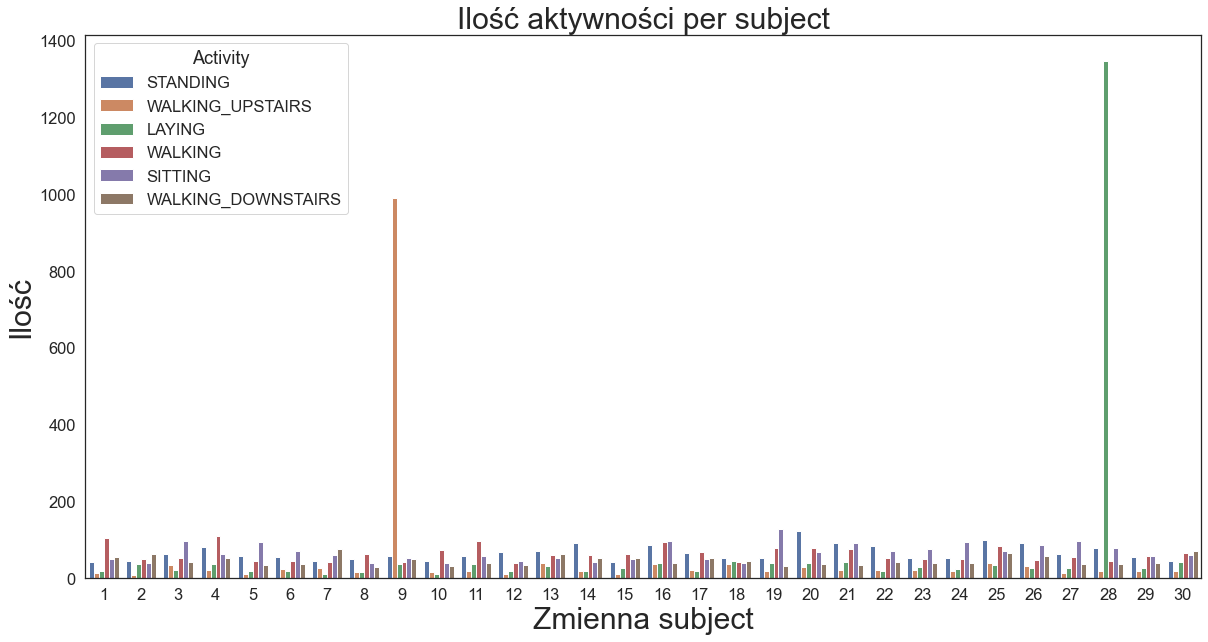

In [9]:
# Wykres Ilość aktywności per subject
sns.set_style('white')
plt.figure(figsize=(20,10))
plt.title('Ilość aktywności per subject', fontsize=30)
#ax = sns.displot(x='shadow-gravity-angle()',hue='Activity', data = train_df)
ax = sns.countplot(x='subject',hue='Activity', data = train_df)
ax.set_xlabel("Zmienna subject",fontsize=30)
ax.set_ylabel("Ilość",fontsize=30)
plt.savefig("graphics/00_acitivity_per_subject.png", transparent=True, dpi=300, bbox_inches='tight')
plt.show()

In [10]:
# Zliczenie ilości kolumn numerycznych w zbiorze danych
num_cols = train_df._get_numeric_data().columns
print("Number of numeric features:",num_cols.size)

Number of numeric features: 571


In [11]:
df = pd.read_csv('final_train.csv', index_col=0)
columns = df.columns
columns = columns.str.replace('[()]','')
columns = columns.str.replace('[-]', '')
columns = columns.str.replace('[,]','')
df.columns = columns

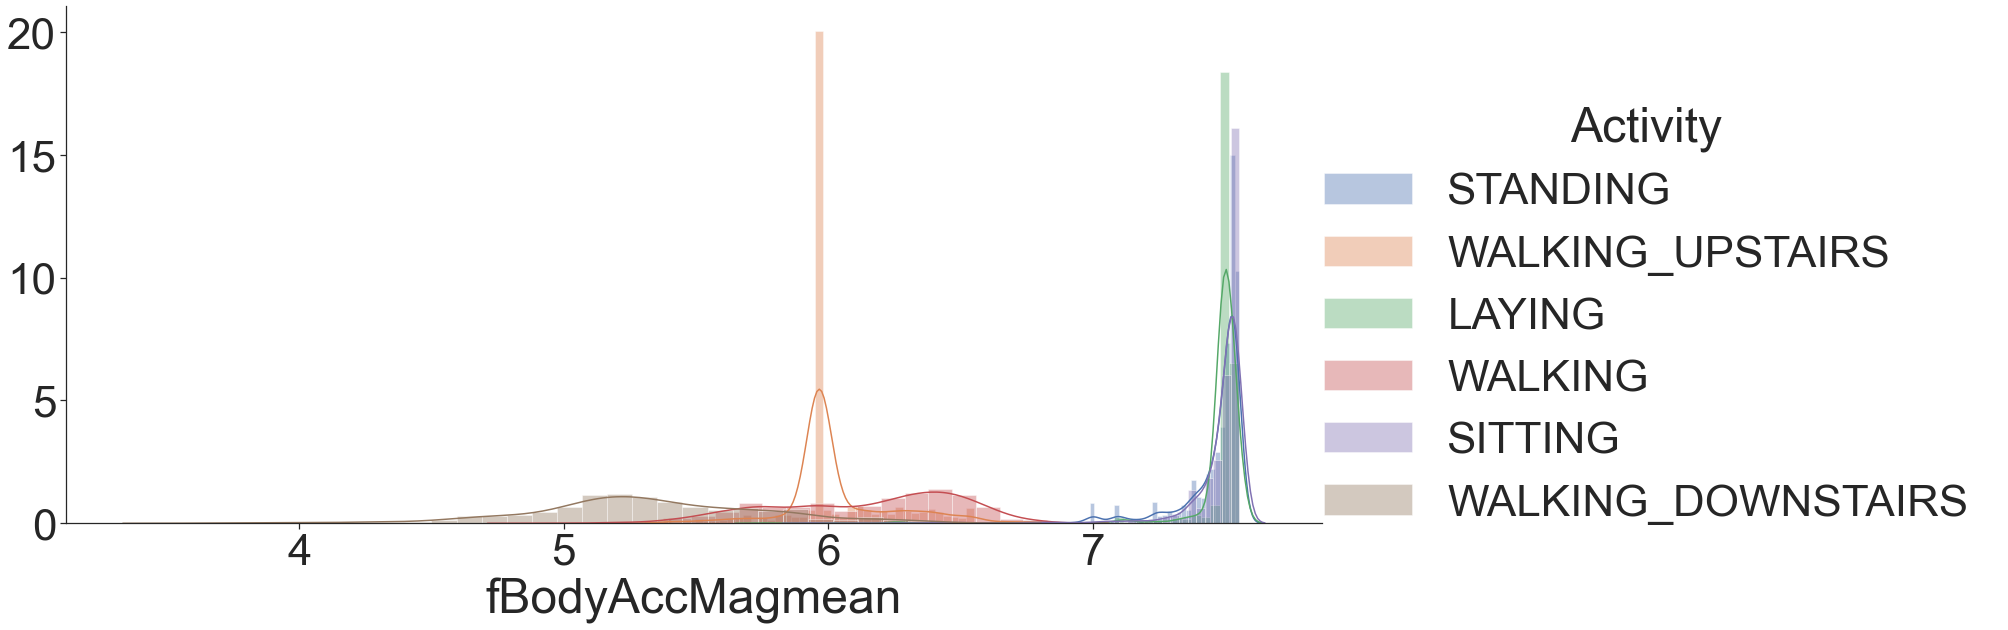

In [12]:
sns.set_palette('Set2')
sns.set(font_scale=4,style='ticks')
wykres = sns.FacetGrid(df, hue='Activity', size=10,aspect=2)
wykres.map(sns.distplot,'fBodyAccMagmean', hist=True).add_legend()
arrowprops=dict(arrowstyle='fancy',connectionstyle='arc3,rad=0.1')
plt.savefig("graphics/00_exploratoryg_of_histograms.png", transparent=True, dpi=300, bbox_inches='tight')
plt.show()